# Simulating a Raman transition with constant lasers
To present the features of the package, we show the simulation of a theoretically well understood transition that takes advantage of a detuning: the Raman transition. Here, we will simulate the system with constant lasers. For laser pulses see the second tutorial. \
Feel free to change parameters and play around to compare the simulation results with the theory.

In [2]:
from atomcalc import Level, Laser, Decay, System, plot_pulse

We define the energy levels, the decay channels (here we assume no decay), the laser parameters, and the system. \
`Delta` is the detuning at `level3` and `delta` is the detuning at `level2` in angular frequency. The `Omega` are the Rabi frequencies of the corresponding lasers in angular frequency. \
The `frequency` argument of the laser is the energy that corresponds to the frequency of the laser. In atomic units that would be the same as the angular frequency. \
Using the `draw` function we can look at a sketch of the system.

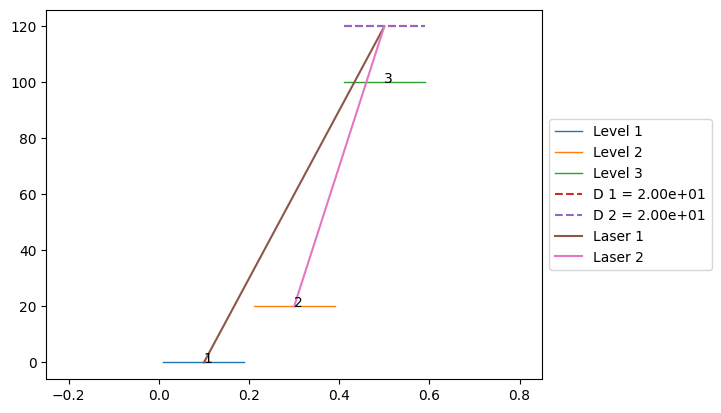

In [3]:
# define level objects
level1 = Level(0)
level2 = Level(20)
level3 = Level(100)

# define decay object
decay = Decay([0,0],[[level3,level1],[level3,level2]]) # no decay
# Alternatively: decay = Decay([0],[[level3,level1]]). It needs at least one entry.

# define parameters
Delta = 20
delta = 0
Omega1 = 1
Omega2 = 1

# define lasers (sort level couples from low to high energy.)
laser1 = Laser(Omega1, 100 + Delta, [level1,level3])
laser2 = Laser(Omega2, 80 + (Delta-delta), [level2,level3])

# define system (sort levels by energy in ascending order. The order of the lasers should not matter.)
system = System([level1,level2,level3], [laser1,laser2], decay)

# draw the system in matplotlib
system.draw()

Now, we can simulate the time evolution of the level population. \
Note that a laser only affects the one specific transition that it is assigned to.

Hamiltonian in the rotating frame: Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[ 0.   0.   0.5]
 [ 0.   0.   0.5]
 [ 0.5  0.5 20. ]]


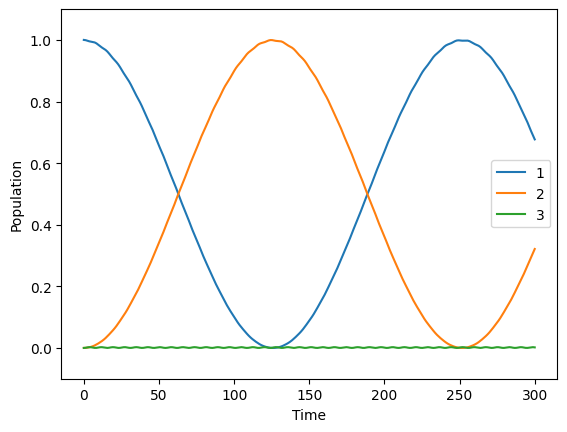

Maximum population of level 2:


0.999536989981741

In [4]:
# calculate and show the time evolution
system.simulate([1,0,0], 1, 300, Diagonalization=True)